In [1]:
import os
import pickle
from glob import glob
import numpy as np
import torch
import pandas as pd
from fsl.data.image import Image
from fsl.utils.image.resample import resampleToPixdims
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
path = 'T1_brain_to_MNI_linear.pkl'
data = pd.read_pickle(path)
data.head()

,min,max,mean,med,std,1p,25p,75p,99p,norm99p
23425368,-206.586624,2545.689697,209.962601,9.217567e-22,377.356232,-2.022487,-7.007990e-25,279.808205,1202.995408,5.729570
22943860,-452.638916,3069.639160,247.078949,4.184133e-23,452.456604,-3.034873,-1.655730e-24,273.233444,1445.803757,5.851586
24837551,-323.162659,2936.575928,248.818314,1.406190e-21,448.709747,-3.511182,-1.508807e-23,312.063965,1406.830743,5.654048
25243303,-271.075928,2745.446777,214.389786,6.716253e-23,385.430695,-1.892604,-1.812903e-25,285.083984,1236.137056,5.765839
31722154,-389.502075,3002.161621,262.274414,3.745035e-23,468.247955,-2.301622,-1.124499e-25,380.018684,1474.128014,5.620556


In [3]:
def get_array(df,col):
    return df.loc[:][col].values

def stats_calc(df,col):
    arr = get_array(df,col)
    return np.min(arr), np.max(arr), np.mean(arr), np.median(arr), np.std(arr)

def plot_hist(df, col, title=None):
    array = get_array(df, col)
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    ax.grid(axis='y', alpha = 0.75, b=True, which='major', linestyle='-')
    ax.hist(array, bins=50, color='blue', alpha=0.7, rwidth=0.85)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
#     plt.title(title)
    fig.patch.set_facecolor('xkcd:white')
    _,_,mean,_,std = stats_calc(df, col)
    if col == 'min':
        thr = mean - 2 * std
    elif col=='max':
        thr = mean + 2 * std
    if col == 'min' or col =='max':
        ax.axvline(x=thr, color='r', linestyle='dashed', linewidth=2)
    else:
        ax.axvline(x=mean, color='r', linestyle='dashed', linewidth=2)
    plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+'_'+col+'_Hist'+'.png', dpi=300, facecolor='none', bbox_inches="tight")

def plot_bars(df, labels_list, title=None):
    array_list = get_array(df,labels_list)
#     fig = plt.figure(figsize=(8,6))
    fig, ax = plt.subplots(figsize=(8,6))
#     ax.set_title(title)
    ax.grid(axis='y', alpha = 0.75)
    ax.boxplot(array_list)
    ax.set_xticklabels(labels_list)
    # ax.set_xticklabels(['0', '1', '2','3','4','5', '25', '50', '75','95', '96', '97','98','99', '100'])
    plt.xlabel('Percentile')
    plt.ylabel('Values')
    plt.grid(axis='y', alpha = 0.75)
    fig.patch.set_facecolor('xkcd:white')
    # plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, facecolor='none', bbox_inches="tight")
    plt.savefig(title+'_'+'_Bar'+'.png', dpi=300, bbox_inches="tight")
    # plt.savefig(title+' UKBB'+'.png')

In [4]:
print('Stats (min, max, mean, med, std) for MIN: ', stats_calc(data, 'min'))
print('Stats (min, max, mean, med, std) for MAX: ', stats_calc(data, 'max'))
print('Stats (min, max, mean, med, std) for NORM99p: ', stats_calc(data, 'norm99p'))

Stats (min, max, mean, med, std) for MIN:  (-815.7423095703125, -24.67442512512207, -292.6851779522959, -286.3986053466797, 69.36596207265262)
Stats (min, max, mean, med, std) for MAX:  (201.8314208984375, 4982.802734375, 2753.2013794658524, 2683.902587890625, 669.5064906243017)
Stats (min, max, mean, med, std) for NORM99p:  (4.653258457183835, 6.921643323898314, 5.678573626611138, 5.671951327323913, 0.14412874910576204)


In [5]:
_,_,mean,_,std = stats_calc(data, 'min')
print(mean-2*std)
_,_,mean,_,std = stats_calc(data, 'max')
print(mean+2*std)

-431.4171020976011
4092.214360714456


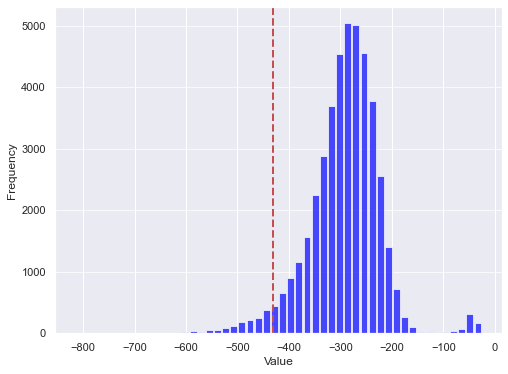

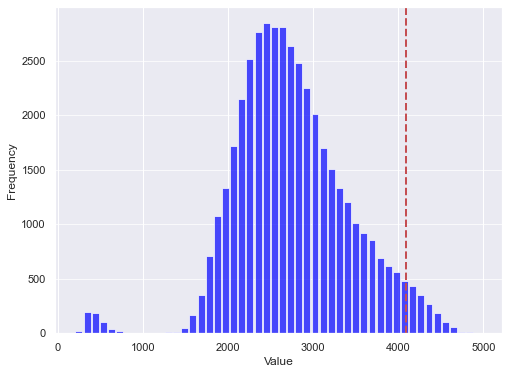

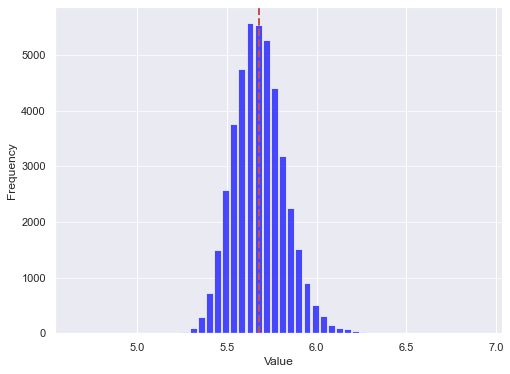

In [6]:
plot_hist(data, 'min', title='T1_Linear_Min_Value_Distribution')
plot_hist(data, 'max', title='T1_Linear_Max_Value_Distribution')
plot_hist(data, 'norm99p', title='T1_Linear_norm99p_Value_Distribution')

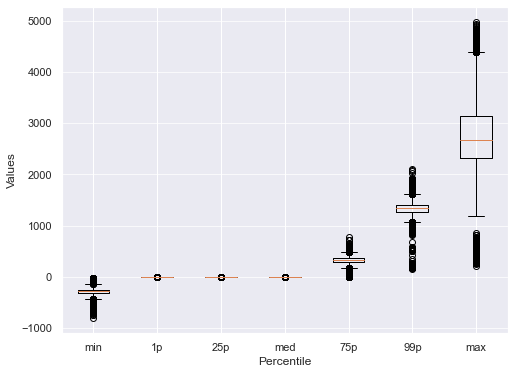

In [7]:
plot_bars(data, ['min', '1p', '25p', 'med', '75p','99p', 'max'], 'T1_Linear_Voxel_Intensity_Value_Distribution')

In [8]:
data['min_corrected'] = data['min'] / data['mean']
data['max_corrected'] = data['max'] / data['mean']

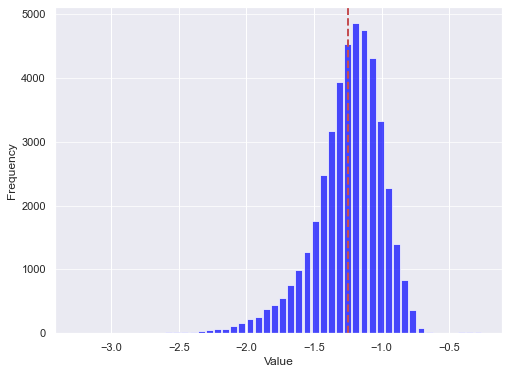

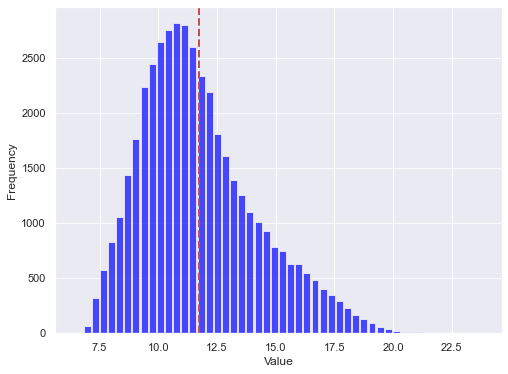

In [9]:
plot_hist(data, 'min_corrected', title='T1_Linear_Min_C_Value_Distribution')
plot_hist(data, 'max_corrected', title='T1_Linear_Max_C_Value_Distribution')

In [10]:
data['min_norm'] = data['min_corrected'] / np.mean(data['norm99p'])
data['max_norm'] = data['max_corrected'] / np.mean(data['norm99p'])

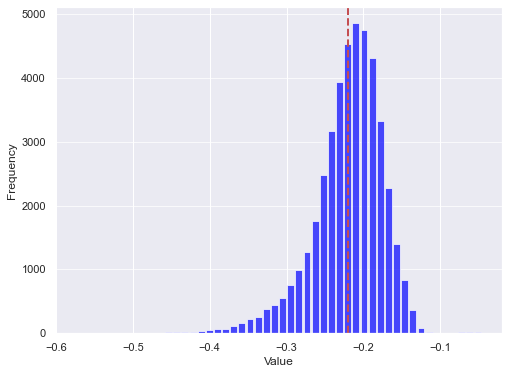

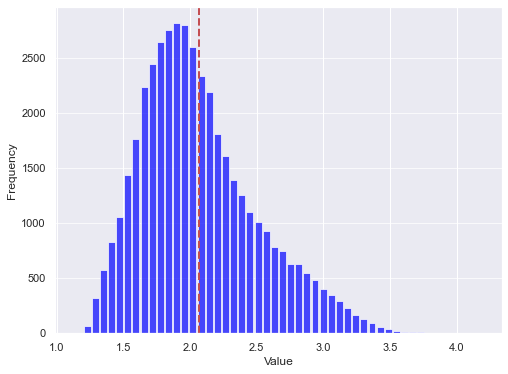

In [11]:
plot_hist(data, 'min_norm', title='T1_Linear_Min_N_Value_Distribution')
plot_hist(data, 'max_norm', title='T1_Linear_Max_N_Value_Distribution')